# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [351]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [352]:
# %matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


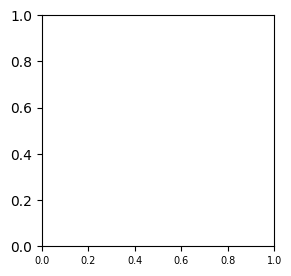

In [353]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

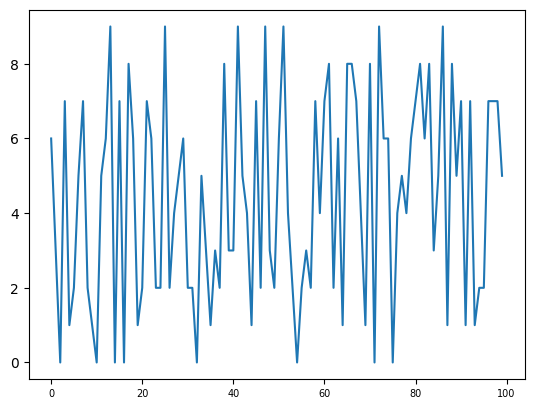

In [354]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

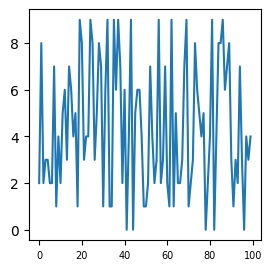

In [355]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

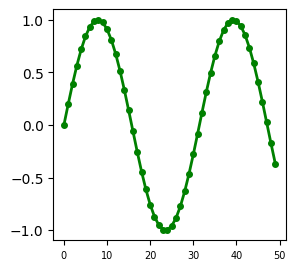

In [356]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
# y = np.sin(x / 5 - 1)
# plt.plot(x, y)
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

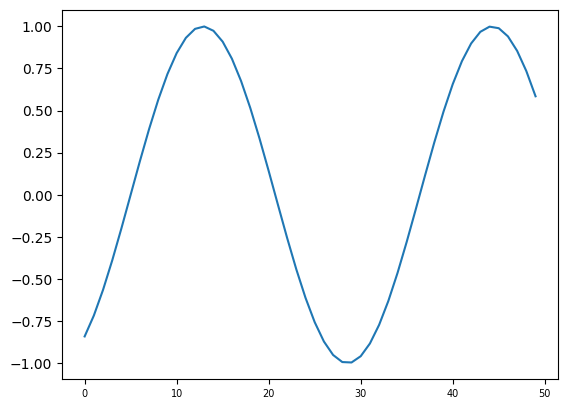

In [357]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


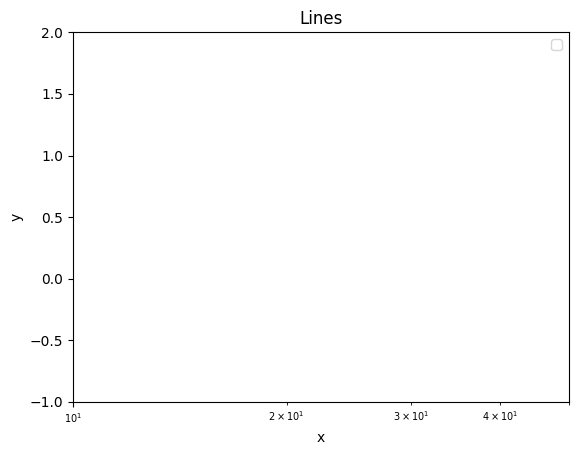

In [358]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

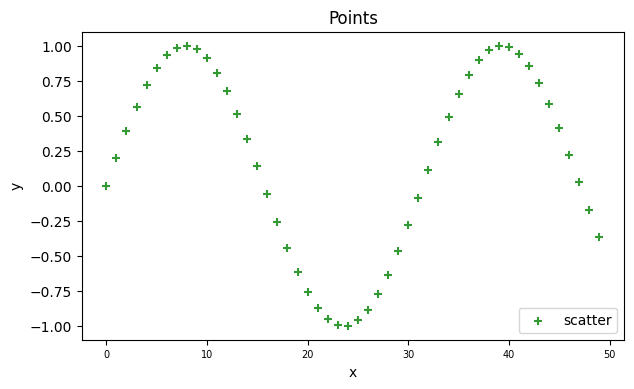

In [359]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

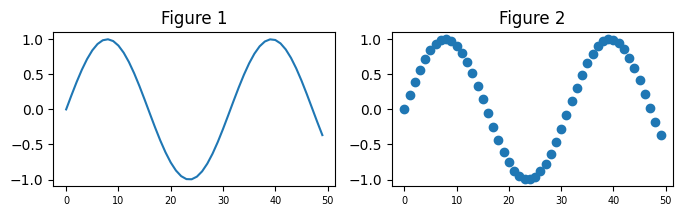

In [360]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

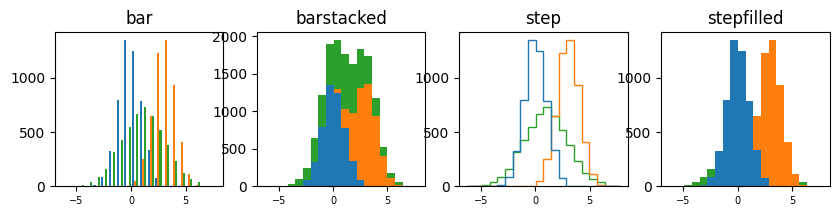

In [361]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

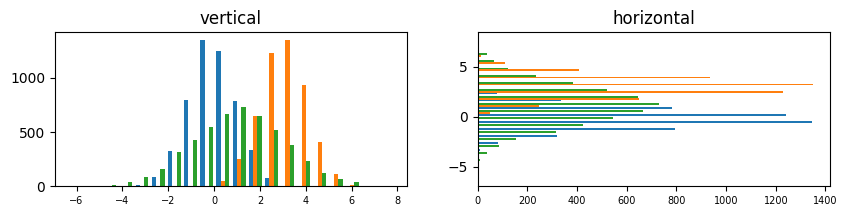

In [362]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [363]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.971783,0.297401,0.105622,0.756517,0.379516,0.623333,0.404646,0.181335,0.630945,0.817468
1,0.845734,0.019166,0.504410,0.542533,0.117733,0.657692,0.842372,0.034620,0.895175,0.328724
2,0.220752,0.426254,0.284301,0.910300,0.476643,0.334204,0.043451,0.368238,0.176808,0.267141
3,0.364616,0.119545,0.841528,0.859674,0.217103,0.919443,0.475858,0.831479,0.047656,0.719857
4,0.299464,0.953575,0.337776,0.290456,0.061814,0.776754,0.835348,0.808378,0.851949,0.912010


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

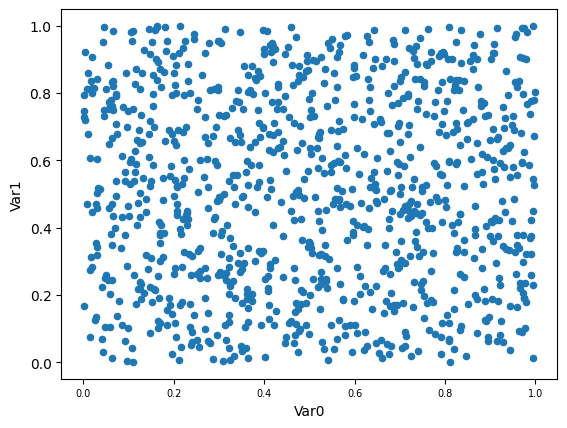

In [364]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

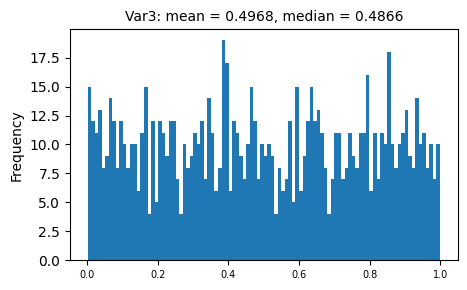

In [365]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

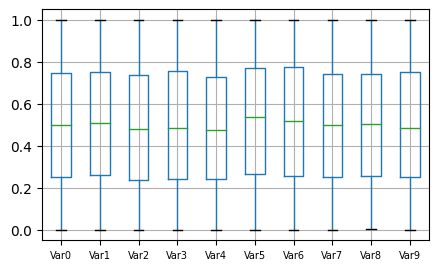

In [366]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

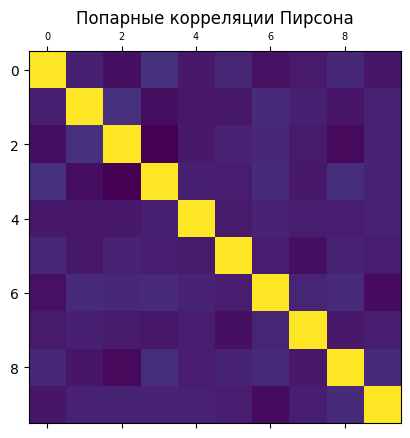

In [367]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

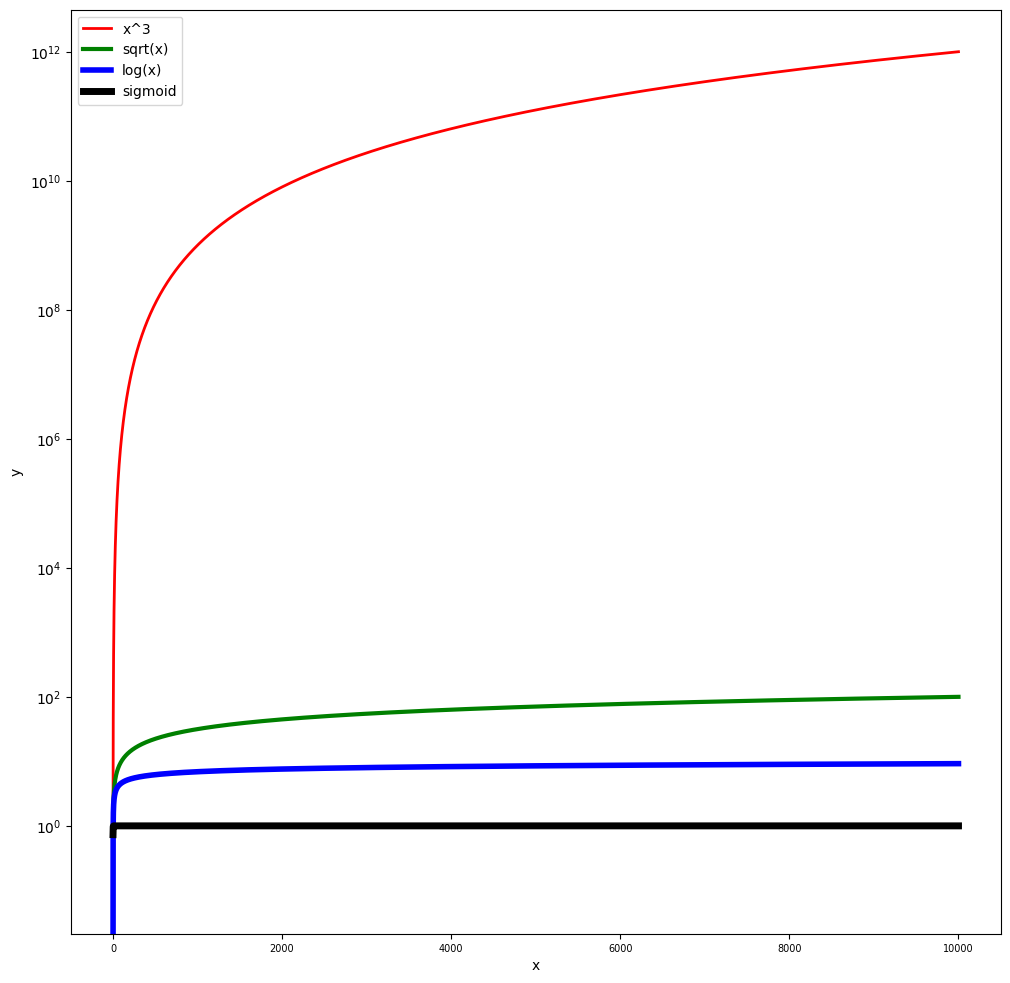

In [368]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))
plt.yscale('log') # Choose the right scale else the sigmoid is hardly visible

x = np.arange(1, 10000, 0.1)

# Plot cubic parabola y = x^3
plt.plot(x, x**3, color='red', linewidth=2, label='x^3')

# Plot square root
plt.plot(x, np.sqrt(x), color='green', linewidth=3, label='sqrt(x)')

# Plot logarithm
plt.plot(x, np.log(x), color='blue', linewidth=4, label='log(x)')

# Plot sigmoid
plt.plot(x, 1/(1+np.exp(-x)), color='black', linewidth=5, label='sigmoid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [369]:
# напишите здесь ваш код

# Create dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Add 50 normally distributed columns
for i in range(50):
    mean = i
    std = i + 1
    col_name = 'col_{}'.format(i)
    df[col_name] = np.random.normal(mean, std, 1000)

df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001594,1.001524,2.025413,2.825169,3.737185,4.850939,6.091379,7.139833,8.023385,9.071696,...,42.001635,42.492528,41.098368,42.551003,43.425669,46.674930,46.156095,47.536165,49.781805,49.239059
std,1.041786,1.973441,2.955671,4.004633,4.841009,5.951992,7.086932,7.826793,8.751804,9.915606,...,41.883646,43.496309,42.313641,43.734079,45.450535,46.559769,47.165437,46.980094,49.637675,48.990036
min,-3.362347,-5.082787,-7.584738,-10.032772,-14.056204,-17.638063,-20.821763,-16.492700,-25.355299,-21.698609,...,-101.210762,-96.861928,-87.571140,-106.482841,-99.556544,-91.975965,-97.954362,-116.827425,-91.581593,-115.675278
25%,-0.652275,-0.256881,-0.002246,0.165497,0.483930,0.925941,1.520238,1.870490,2.314961,2.536061,...,13.199172,13.129565,14.580689,14.287274,12.447299,15.313340,15.721321,16.625188,15.527002,14.505778
50%,-0.023955,1.031973,2.038178,2.862292,3.667587,4.883893,6.076478,7.053352,8.012928,8.880359,...,41.726927,42.615784,40.688192,41.209542,43.367093,48.321829,45.154865,47.480190,48.464895,49.159416
75%,0.649186,2.396809,3.972687,5.454398,6.956466,8.975997,10.880946,12.552801,13.650261,15.245359,...,71.339380,71.068458,68.408131,71.988608,72.372290,79.159781,77.289594,78.655105,82.348136,82.585153
max,3.870465,7.033336,10.459978,15.798735,17.642441,22.939789,31.321499,30.748157,40.759565,44.044564,...,161.883185,212.687379,172.541803,189.968634,218.570978,212.134652,195.057453,186.953800,201.551467,200.075028


3. Определите медианы и стандартные отклонения для всех колонок.

In [370]:
# напишите здесь ваш код
result = None

columns = df.columns
indices = ['std', 'median']
result = pd.DataFrame(np.empty(shape=(len(indices), len(columns))), columns=columns, index=indices)

result.loc['std'] = df.apply(np.std, axis=0)
result.loc['median'] = df.apply(np.median, axis=0)

result


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
std,1.041265,1.972454,2.954193,4.002630,4.838588,5.949015,7.083388,7.822879,8.747427,9.910647,...,41.862699,43.474555,42.292479,43.712206,45.427804,46.536483,47.141849,46.956598,49.612850,48.965535
median,-0.023955,1.031973,2.038178,2.862292,3.667587,4.883893,6.076478,7.053352,8.012928,8.880359,...,41.726927,42.615784,40.688192,41.209542,43.367093,48.321829,45.154865,47.480190,48.464895,49.159416


4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

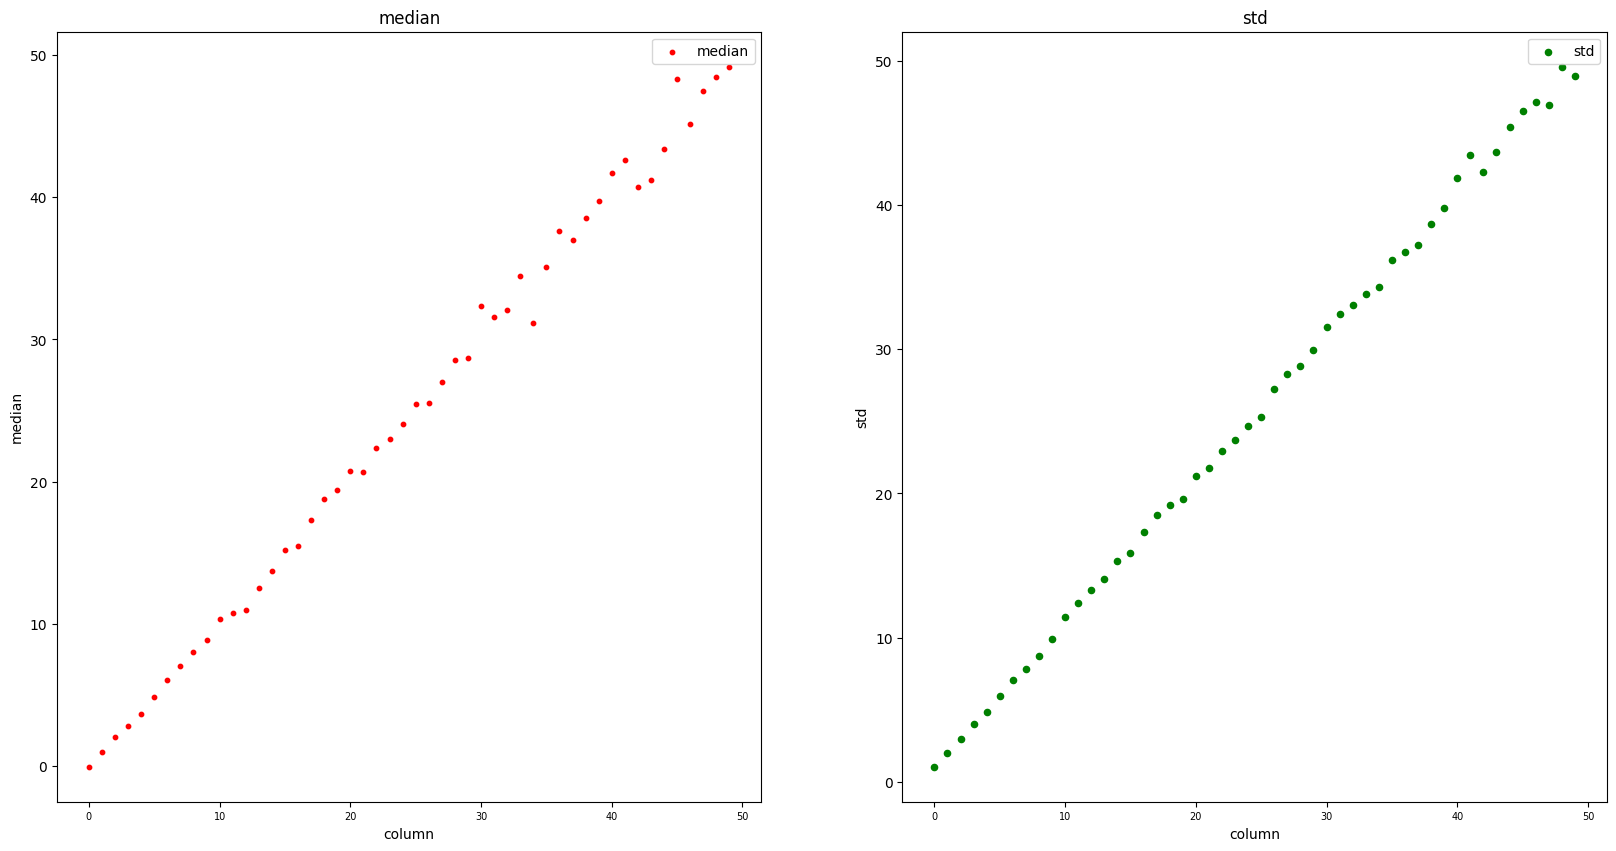

In [371]:
# напишите здесь ваш код
import matplotlib

matplotlib.rc('xtick', labelsize=7)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

plt.scatter(np.arange(0, len(result.columns)), result.loc['median'], color='red', s=10, label='median')

plt.title('median')
plt.xlabel('column')
plt.ylabel('median')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(np.arange(0, len(result.columns)), result.loc['std'], color='green', s=20, label='std')

plt.title('std')
plt.xlabel('column')
plt.ylabel('std')
plt.legend()

plt.show()

5. Постройте boxplot для любых 10 колонок.

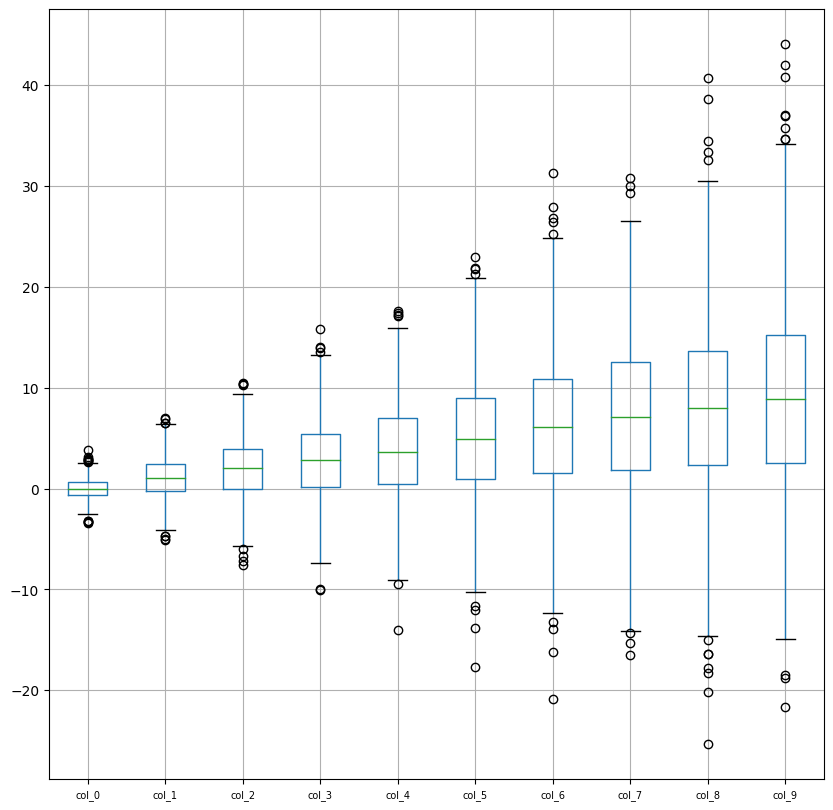

In [372]:
# напишите здесь ваш код
plt.figure(figsize=(10,10))
df.boxplot(column = list(df.columns[0:10]))
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [373]:
# напишите здесь ваш код

# Создаем таблицу с 1000 колонками и 1000 строками
data = np.random.uniform(0, 1, size=(1000, 1000))

# Преобразуем массив данных в DataFrame с помощью pandas
df = pd.DataFrame(data)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.494185,0.506204,0.496858,0.497774,0.496278,0.517133,0.494205,0.499594,0.498646,0.489195,...,0.516151,0.512947,0.500587,0.503828,0.508095,0.486121,0.488474,0.502542,0.500957,0.495832
std,0.294035,0.291192,0.297086,0.284554,0.288407,0.283443,0.290101,0.285096,0.290337,0.293245,...,0.288674,0.291874,0.287175,0.294110,0.287795,0.294091,0.292507,0.290771,0.295521,0.294549
min,0.001987,0.000003,0.000406,0.000571,0.001374,0.000493,0.000223,0.002582,0.001950,0.000361,...,0.001601,0.000946,0.000779,0.001374,0.000040,0.002974,0.000595,0.002016,0.000805,0.001000
25%,0.234322,0.258020,0.234078,0.247625,0.253150,0.285048,0.238960,0.253933,0.246807,0.231260,...,0.260520,0.250746,0.249200,0.244580,0.252170,0.227935,0.226817,0.248936,0.241429,0.229080
50%,0.497470,0.507795,0.486855,0.502796,0.482432,0.528272,0.486729,0.496191,0.491295,0.481584,...,0.534926,0.505651,0.490691,0.511822,0.508008,0.467684,0.486420,0.508806,0.493182,0.493321
75%,0.749698,0.754488,0.757274,0.736264,0.748749,0.754389,0.750050,0.741331,0.749127,0.732340,...,0.765793,0.765651,0.741970,0.761139,0.753848,0.730663,0.728576,0.754361,0.765589,0.755104
max,0.999810,0.998485,0.998707,0.996581,0.999013,0.999108,0.998337,0.999968,0.998565,0.999513,...,0.998368,0.999827,0.999962,0.999159,0.998670,0.999499,0.998799,0.997871,0.998513,0.997528


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

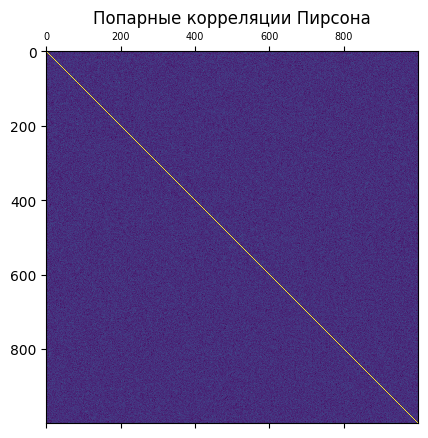

In [374]:
corr = df.corr()
plt.matshow(corr)
plt.title('Попарные корреляции Пирсона')
plt.show()

# continuous below

In [375]:
corr_no_lower_tri = corr

# Remove duplicates
corr_no_lower_tri.values[np.tril_indices_from(corr_no_lower_tri.values)] = 0

corr_no_lower_tri

# continuous below

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.020141,0.001362,-0.001989,-0.025378,-0.000613,0.010065,0.051590,0.007847,0.011490,...,0.016208,-0.055728,-0.010152,0.018359,0.015628,0.012837,0.003743,-0.026164,0.027530,-0.035293
1,0.0,0.000000,-0.013881,-0.053174,-0.027066,0.003234,-0.047860,0.001871,0.006795,-0.043885,...,0.021992,0.049844,-0.004117,0.022252,0.009455,0.014839,0.025210,-0.019228,-0.041653,0.010301
2,0.0,0.000000,0.000000,-0.025452,-0.019480,-0.014978,-0.018208,-0.008124,-0.022292,0.061349,...,-0.045749,0.013613,-0.000104,0.013367,-0.050667,0.067620,-0.008153,-0.017377,-0.007035,-0.009909
3,0.0,0.000000,0.000000,0.000000,-0.011524,-0.017171,0.014248,0.045969,0.000556,-0.043255,...,0.041935,-0.053206,-0.023080,0.055540,0.032947,-0.029222,-0.000555,-0.023372,0.018368,-0.004538
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.032596,0.045152,-0.042442,0.033222,-0.019646,...,0.048181,-0.022184,0.006827,-0.002995,-0.053367,-0.027234,-0.034627,-0.037031,-0.051082,-0.012768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029548,-0.025114,0.018217,0.007999
996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010818,0.011334,0.013096
997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059683,-0.029118
998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001107


In [376]:
# Get indices (col1, col2) of maximums
maximums = corr_no_lower_tri.abs().idxmax().items()

from collections import namedtuple

Corr = namedtuple("Corr", ["col1", "col2", "corr"])

corr = []

# zip indices and values obtained by that indices
for maximum_idx, corr_value in zip(maximums, corr_no_lower_tri.abs().max().values):
  corr.append(Corr(col1=maximum_idx[0], col2=maximum_idx[1], corr=corr_value))

# Get the four hightest correlations
corr4 = sorted(corr, reverse=True, key=lambda x: x.corr)[0:4]
corr4

[Corr(col1=435, col2=318, corr=0.15457789085346643),
 Corr(col1=668, col2=277, corr=0.1525810206975754),
 Corr(col1=522, col2=498, corr=0.14763279317597303),
 Corr(col1=981, col2=647, corr=0.14366836063577876)]

8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

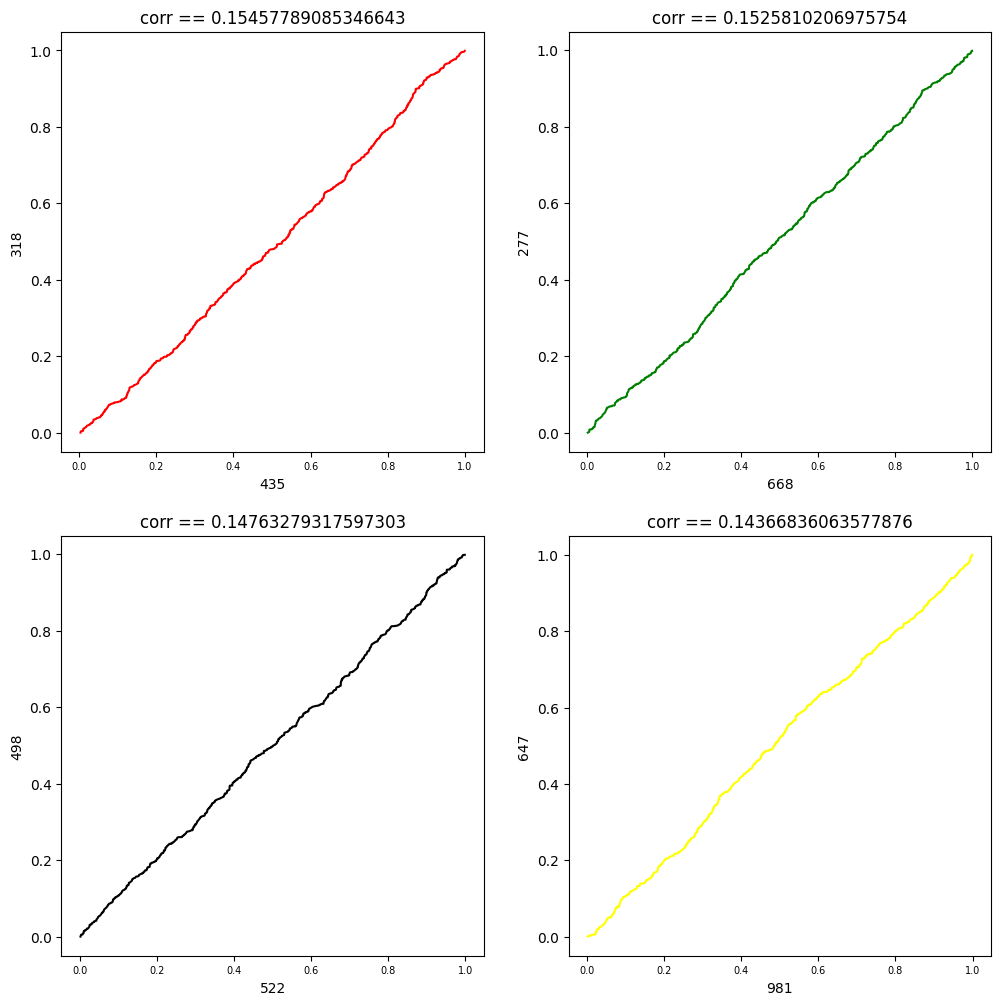

In [377]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)

def plot(corr_item: Corr, color: str):
  plt.plot(sorted(df[corr_item.col1]), sorted(df[corr_item.col2]), color=color)

  plt.title(f'corr == {corr_item.corr}')
  plt.xlabel(corr_item.col1)
  plt.ylabel(corr_item.col2)

plot(corr4[0], 'red')

plt.subplot(2,2,2)
plot(corr4[1], 'green')

plt.subplot(2,2,3)
plot(corr4[2], 'black')

plt.subplot(2,2,4)
plot(corr4[3], 'yellow')

plt.show()

9.  Сделайте вывод о скоррелированности этих случайных величин.

    В соответствии с лекции
    |$r_{xy}$| < 0.19 - очень слабая корреляция

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")